 # 🔌 🚗  <span style='color:#8A9A5B'>Electric Cars Prices </span> 🚗 

<img src="./image/dataset-cover.jpg">

<a id=TOC></a> <br>
# <div style="text-align: Left; background-color: #8A9A5B; font-family:cursive; color: #E5E4E2 ; padding: 14px; line-height: 1;border-radius:20px"> Table of contents: </div>


1. [Introduction](#introduction)
    1. [Data](#data)
    1. [Goal](#goal)
1. [Preparation](#preparation)
    1. [Customize](#customize)
    1. [Importing data](#importing)
    1. [Cleaning and validation](#cleaning)     
1.[Let's play with the data](#play)
    1. [Global Sales](#sales) 
    1. [Prices](#prices)
    1. [Relations](#relations)
1. [Conclusion](#conclusion)
1. [References](#references)
  

<a id=introduction></a> <br>
# <div style="text-align: Center; background-color: #8A9A5B; font-family:cursive; color: #E5E4E2 ; padding: 14px; line-height: 1;border-radius:20px"> 1. Introduction </div>
[Table of contents](#TOC)

The main goal of this project is having fun! 



<a id=data></a> <br>
# <div style="text-align: Left; background-color: #8A9A5B; font-family:cursive; color: #E5E4E2 ; padding: 14px; line-height: 1;border-radius:20px"> 1.a Data </div>
[Table of contents](#TOC)

**About Dataset:** _Electric cars are considered to be the future mode of transport. It is interesting to see the trend in average electric car prices and annual sales value in the last decade. The dataset contains electric car prices since 2010, sales volume and battery prices._

8 columns:
- **Year**: The column contains years starting with 2010
- **BEV average price (USD)**: The column contains average price of battery electric cars in dollars (2022)
- **Global Sales Volume**: The column contains global sales volume of battery electric cars
- **Mileage (Km)**: The column contains mileage of fully charged BEVs
- **Lithium Ion Battery Price (USD)**: The column shows the average price of lithium batteries ( a key component of electric cars)
- **Average price of new car**:

👉 URL Data: https://www.kaggle.com/datasets/iannjuguna/electric-car-prices

⚠️ Data Source unknown!



<a id=goal></a> <br>
# <div style="text-align: Left; background-color: #8A9A5B; font-family:cursive; color: #E5E4E2 ; padding: 14px; line-height: 1;border-radius:20px"> 1.b Goal </div>
[Table of contents](#TOC)

🤔 We should look for:
  
 ❓ Has the Global Sales of the Battery Electric Vehicles increased or decreased since 2010? 
 
 ❓ Has Battery Electric Vehicles Prices increased or diminished since 2010?
 
 ❓ How is the trend of Lithium Ion Battery price (USD)?
 
 ❓ How the variables are correlated? The price of the Battery Electric Vehicles influences the Global Sales? Does the milenage increase the price of the vehicle? 

<a id=preparation></a> <br>
# <div style="text-align: Center; background-color: #8A9A5B; font-family:cursive; color: #E5E4E2 ; padding: 14px; line-height: 1;border-radius:20px">2. Preparation 🛠️</div>
[Table of contents](#TOC)

In this section we import the modules, customize variables and define the functions which are used later in the code. We also read and clean the data in order to work with it in the third section.


<a id=customize></a> <br>
# <div style="text-align: Left; background-color: #8A9A5B; font-family:cursive; color: #E5E4E2 ; padding: 14px; line-height: 1;border-radius:20px"> 2.a - Customize 🤳 </div>
[Table of contents](#TOC)

In [1]:
# Import modules
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

In [19]:
# variables (windows)

#file name
# kaggle data set
#filename = '../input/electric-car-prices/Electric cars.csv'
# local computer
filename = './data/Electric cars.csv'

# visualization
sns.set_context('notebook', 
                font_scale=1.5) 
                #rc={"lines.linewidth": 3}
color_graph = '#8A9A5B'
color_background = '#E5E4E2'

#bold format
txt_bold_start = "\033[1m"
txt_bold_ends = "\033[0m"

#Percentage Change - baseline year
Baseline_year = 2010


<a id=Function_DisplayTrend></a> <br>
### Display Trend Function

In [3]:
def DisplayTrend(df, col, color_custom):
    
    '''
        Display trend of the column col

        Parameters
        ----------
        df_in: dataframe
        
        col: str
            Name of the column 
            
        color_custom: str
            Color graph

        Display
        -----------
        Trend plot

    '''
    
    fig, ax = plt.subplots(figsize=(15, 10))
    
    #trend line   
    x_values = df.index.values
    y_values = df[col].values
    
    #type of plot
    _ = sns.lineplot( ax = ax,
                      data = df,
                      x = x_values,
                      y = y_values,
                      sort = False,
                      color = color_custom,
                      linewidth=5        
                    )   
    
    #Setting title and labels
    title_obj = plt.title("Trend of {0} ".format(col), size=20)
    plt.setp(title_obj, color=color_custom)  
    ax.set_xlabel("Years")
    ax.set_ylabel("{0}".format(col))
    
    plt.show()
    

<a id=Function_PlotGrow></a> <br>
### Plot Grow Function
See the documentation for calculate percentages changes <a name="ref-1"/>[(How do you calculate sales growth?)](#cite-CalculateSalesGrowth). 

In [4]:
def PlotGrowth(df, col, Baseline_year, color_custom):
    '''
        Display growth trend, calculation of percentage change with respect to the baseline_year

        Parameters
        ----------
        df_in: dataframe
        
        col: str
            Name of the column 
            
        Baseline_year: int
            Baseline year 
            
        color_custom: str
            Color graph

        Display
        -----------
        Growth trend plot
    '''
    fig, ax = plt.subplots(figsize=(15, 10))

    # Formula and Calculation of Percentage Change
    Baseline = df.loc[Baseline_year][col]

    # values
    x_values = df.index.values
    y_values = 100 * (df[col].values - Baseline)/Baseline
  
    #Plot
    ax = sns.barplot( x = x_values,
                      y = y_values,
                     color = color_custom       
                    )
    
    #show mumerical values
    for i in ax.containers:
        ax.bar_label(i,fmt="%.2f%%")

    #Title
    title_obj = plt.title("Percentage change {0}, baseline {1}".format(col, Baseline_year), size=20)
    plt.setp(title_obj, color=color_custom)         
    
    plt.show()

<a id=Function_PlotCorrelation></a> <br>
### Plot Correlation Function


In [5]:
def plotCorrelation(df, X_variable, Y_variable, color_custom, log_x):
    '''
        Display data an regression model fit 

        Parameters
        ----------
        df: dataframe
        
        X_variable: str
            Name of the column independent variable
        
        Y_variable: str
            Name of the column dependent variable
            
        color_custom: str
            Color graph
            
        log_x: bool
            True displays Y ~ log(X_variable)

        Display
        -----------
        seaborn.lmplot 
    '''
    
    #_ = sns.set(rc={"figure.figsize":(25, 20)}) 
    _ = sns.lmplot(data= df, 
                   x= X_variable, 
                   y= Y_variable, 
                   logx=log_x,
                   scatter_kws={'color':  color_custom},
                   line_kws={'color':  color_custom},
                   #palette = color_custom,
                   height=10)
    
    #Title
    title_obj = plt.title('Correlation {0} ~ {1}'.format(X_variable, Y_variable), size=20)
    plt.setp(title_obj, color=color_custom)  
    plt.show()


<a id=importing></a> <br>
# <div style="text-align: Left; background-color: #8A9A5B; font-family:cursive; color: #E5E4E2 ; padding: 14px; line-height: 1;border-radius:20px"> 2.b - Importing data 📂	</div>
[Table of contents](#TOC)

In [6]:
# Importing  data
df = pd.read_csv(filename)

In [7]:
# Understand the variables
df_vbles = pd.DataFrame(columns=['Column', 'Type', 'Unique values','Values'])

for i, col in enumerate(df.columns):
    df_vbles.loc[i] = [col, 
                       df[col].dtype,
                       df[col].nunique(), 
                       df[col].unique().tolist()]
    
df_vbles 

,Column,Type,Unique values,Values
0,Year,float64,13,"[2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015...."
1,BEV average price (USD),float64,12,"[64032.0, 51736.0, 52084.0, 56028.0, 44776.0, ..."
2,Global Sales Volume,object,13,"[50000, 60000, 80000, 150000, 224700, 380100, ..."
3,Mileage (Km),object,14,"[127, 139, 160, 189, 210, 211, 233, 267, 304, ..."
4,Lithium Ion Battery Price (USD),float64,13,"[1191.0, 924.0, 726.0, 668.0, 592.0, 384.0, 29..."
5,Unnamed: 5,float64,0,[nan]
6,Unnamed: 6,float64,0,[nan]
7,Average price of new car,float64,13,"[37500.0, 37311.0, 36874.0, 37826.0, 37519.0, ..."


#### 😬  This data frame is a bit  mess!

##### It has two columns with nan values, and the other columns should be integers but we have 'Global Sales Volume' and 'Mileage (km)' columns assigned like objects, but theirs values look like integers 😅; the rest of the columns should be integers, too, should not they?

##### 🛑  🤔 We are in 2022 📆, aren't we?, the average data of this year should not appear until next year. Are this data predictions? 🔮

#### 🧹 🗑️  Time for cleaning, folks!

<a id=cleaning></a> <br>
# <div style="text-align: Left; background-color: #8A9A5B; font-family:cursive; color: #E5E4E2 ; padding: 14px; line-height: 1;border-radius:20px">2.d - Cleaning and validation 🧹  </div>
[Table of contents](#TOC)

In [8]:
# Selecting 12th first rows
df = df[0:12]

# Deleting all columns with nan values
df.dropna(axis=1,how='all',inplace=True)

# Assigning columns formats
for col in df.columns:
    df[col] = df[col].apply(lambda x: int(x))
    
#Seting index
df.set_index('Year', inplace = True)

#Display the head of the data frame
df.head(3)

,BEV average price (USD),Global Sales Volume,Mileage (Km),Lithium Ion Battery Price (USD),Average price of new car
Year,,,,,
2010,64032,50000,127,1191,37500
2011,51736,60000,139,924,37311
2012,52084,80000,160,726,36874


#### We have a tidy and nice dataframe 💃

####  ⚽ Time for playing with data, folks!

<a id=play></a> <br>
# <div style="text-align: Center; background-color: #8A9A5B; font-family:cursive; color: #E5E4E2 ; padding: 14px; line-height: 1;border-radius:20px"> 3. Playing with the data ⚽ </div>
[Table of contents](#TOC)

<a id=sales></a> <br>
# <div style="text-align: Left; background-color: #8A9A5B; font-family:cursive; color: #E5E4E2 ; padding: 14px; line-height: 1;border-radius:20px">3.a - Global Sales  </div>
[Table of contents](#TOC)

#### ❓ Has the Global Sales of the BEV increased or decreased since 2010, what do you think?
##### 🎰 Bets are allowed
👉 [Display Trend Function](#Function_DisplayTrend)

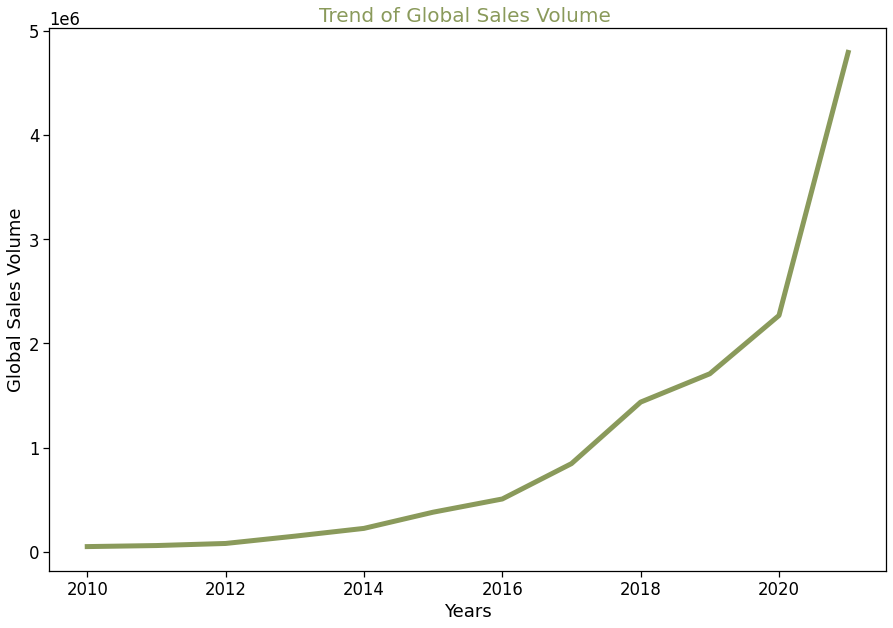

In [9]:
column = 'Global Sales Volume'
DisplayTrend(df, column , color_graph)

🤔 How much the BEV has grown from 2010? <a name="ref-1"/>[(How do you calculate sales growth?)](#cite-CalculateSalesGrowth). 
😵 near 9500 %, this is huge! 🚀 

👉 [Plot Growth Function](#Function_PlotGrow)

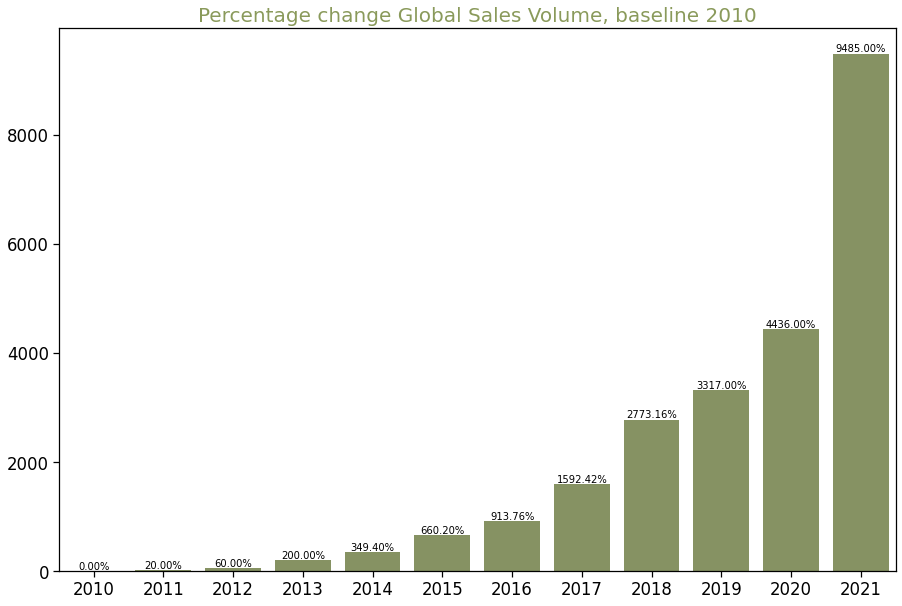

In [10]:
PlotGrowth(df, column , Baseline_year, color_graph)

<a id=prices></a> <br>
# <div style="text-align: Left; background-color: #8A9A5B; font-family:cursive; color: #E5E4E2 ; padding: 14px; line-height: 1;border-radius:20px">3.b -  Price  </div>
[Table of contents](#TOC)

#### ❓ Has Battery Electric Vehicles Prices increased or diminished since 2010?, what do you think?
👉 [Display Trend Function](#Function_DisplayTrend)

👉 [Plot Growth Function](#Function_PlotGrow)

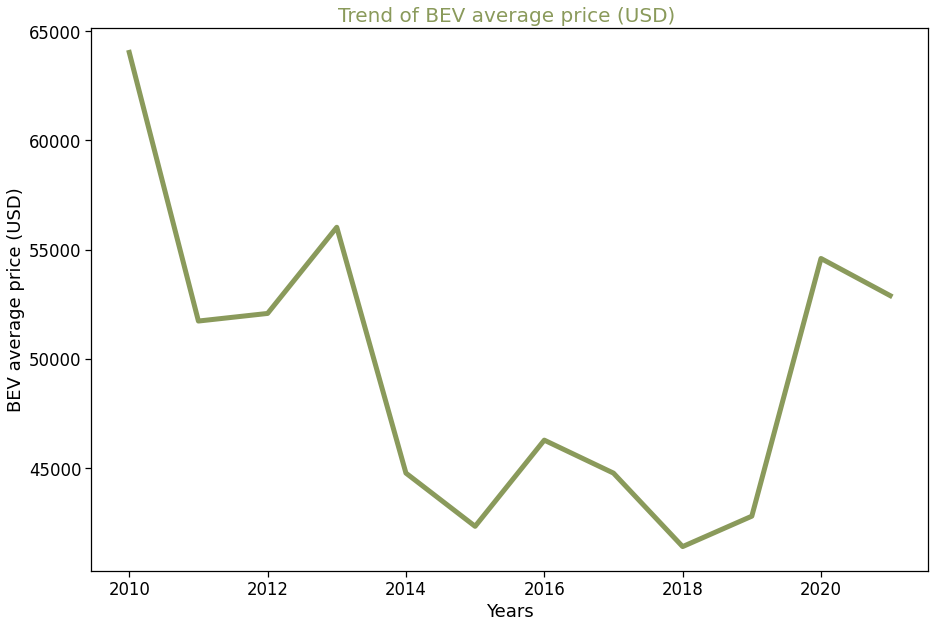

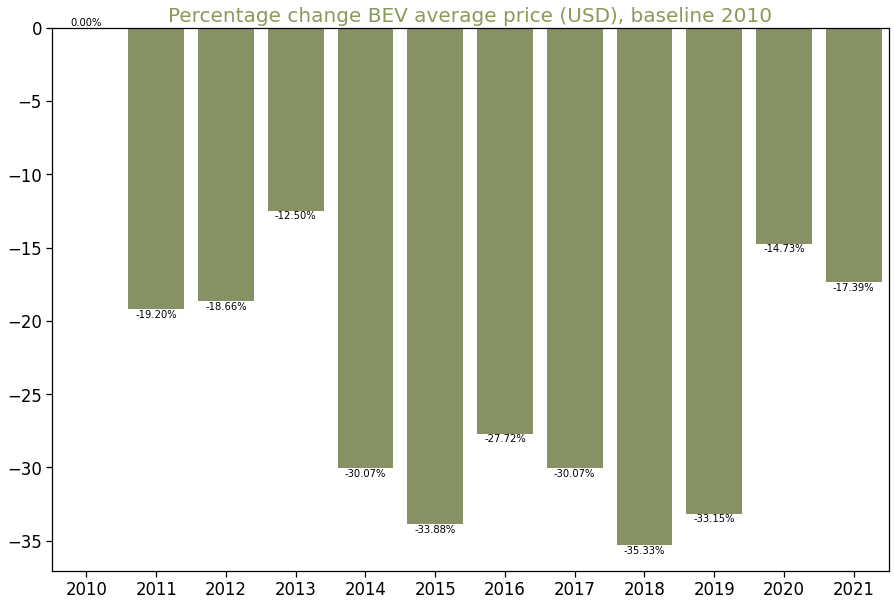

In [11]:
column =  'BEV average price (USD)'
DisplayTrend(df, column , color_graph)
PlotGrowth(df, column , Baseline_year, color_graph)

#### ❓ Has the Prices Battery Electric Vehicles increased or decreased respected the averege price of a new car?
👉 [Display Trend Function](#Function_DisplayTrend)

👉 [Plot Growth Function](#Function_PlotGrow)

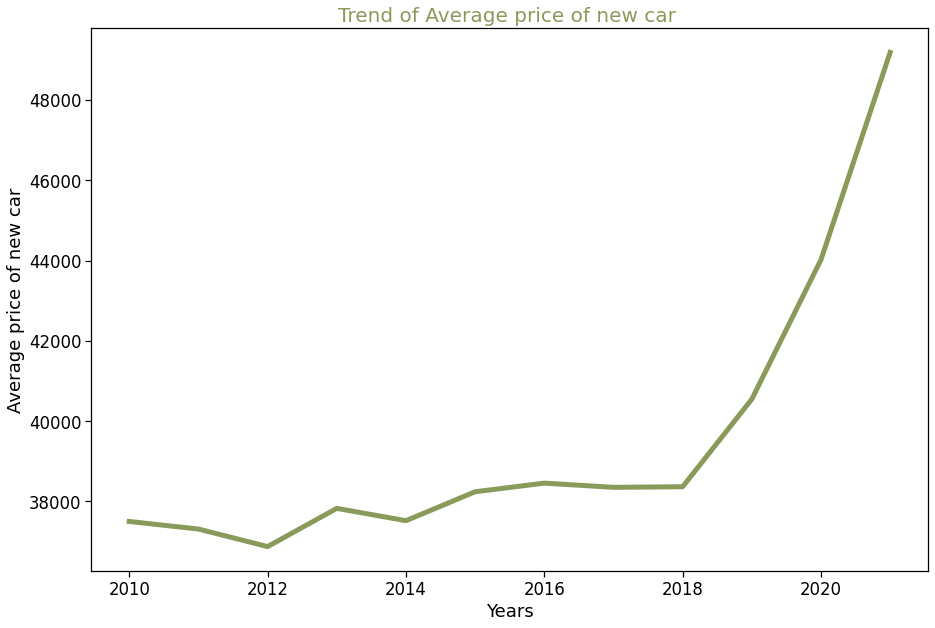

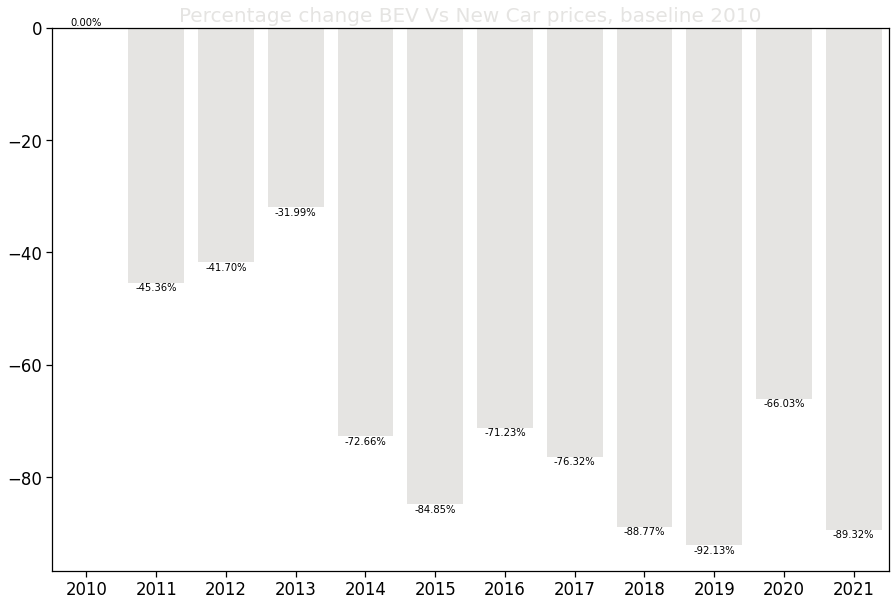

In [12]:
df['BEV Vs New Car prices'] = 100 * (df['BEV average price (USD)'] - df['Average price of new car'])/df['Average price of new car']
DisplayTrend(df, 'Average price of new car' , color_graph)
PlotGrowth(df, 'BEV Vs New Car prices' , Baseline_year, color_background)

#### ❓ How is the trend of Lithium Ion Battery price (USD)?
A summary of the key research issues of Lithium Ion Battery for the Electric Vehicles <a name="ref-2"/>[(A Review of Lithium-Ion Battery for Electric Vehicle Applications and Beyond)](#cite-Lithium-IonBattery). 

👉 [Display Trend Function](#Function_DisplayTrend)

👉 [Plot Growth Function](#Function_PlotGrow)

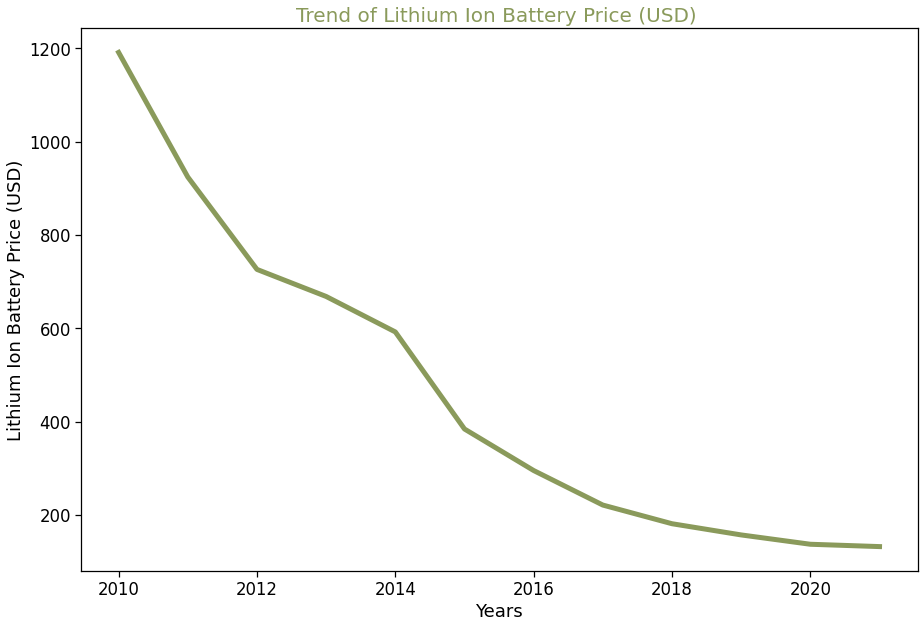

In [13]:
column = 'Lithium Ion Battery Price (USD)'
DisplayTrend(df, column , color_graph)
#PlotGrowth(df, column, Baseline_year, color_graph)

<a id=relations></a> <br>
# <div style="text-align: Left; background-color: #8A9A5B; font-family:cursive; color: #E5E4E2 ; padding: 14px; line-height: 1;border-radius:20px">3.d -  Relations   </div>
[Table of contents](#TOC)

Display a heat map in order to see the correlation between the diferents variables.

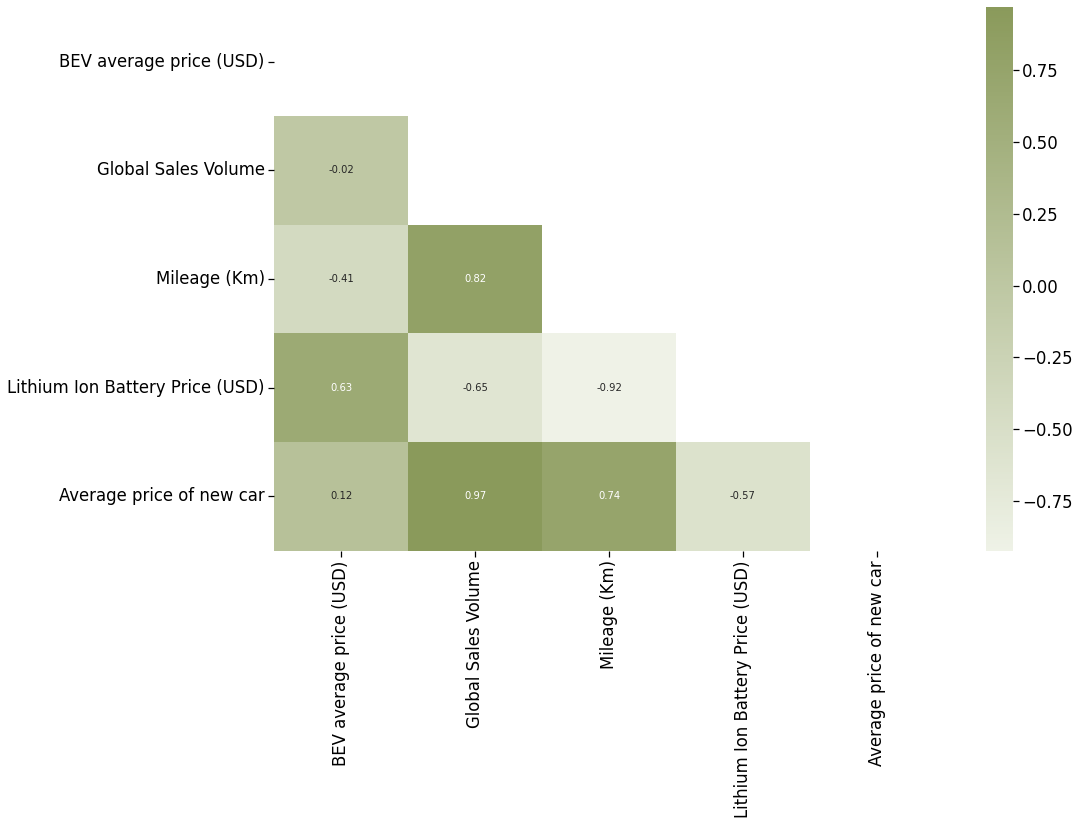

In [14]:
# deleting column 'BEV Vs New Car prices'
del df['BEV Vs New Car prices']

fig, ax = plt.subplots(figsize=(15, 10))
# creating mask
mask = np.triu(np.ones_like(df.corr()))
# plotting a triangle correlation heatmap
_ = sns.heatmap(df.corr(), 
                cmap=sns.light_palette(color_graph , as_cmap=True), 
                annot=True, 
                mask=mask,
                fmt=".2f")
 
# displaying heatmap
plt.show()

👉 [Plot Correlation](#Function_PlotCorrelation)

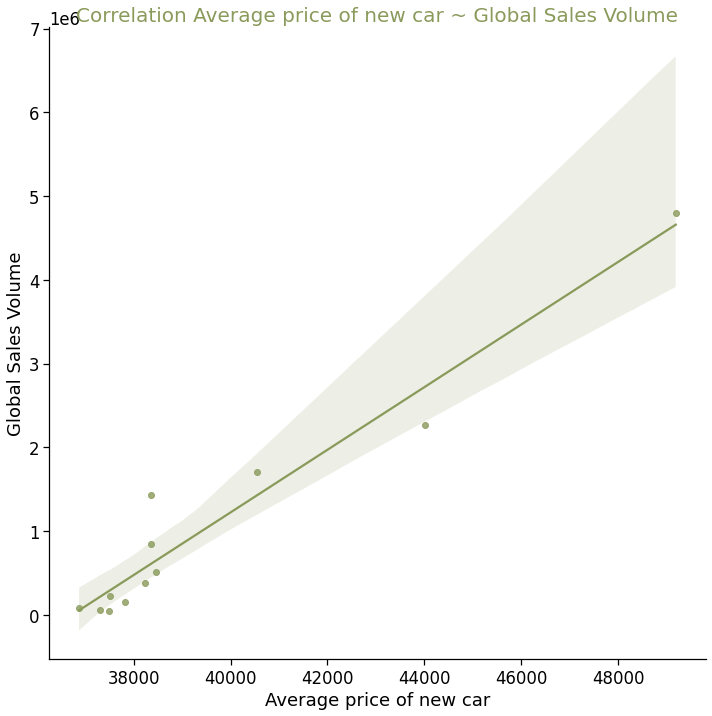

In [15]:
plotCorrelation(df,  'Average price of new car', 'Global Sales Volume', color_graph, False)

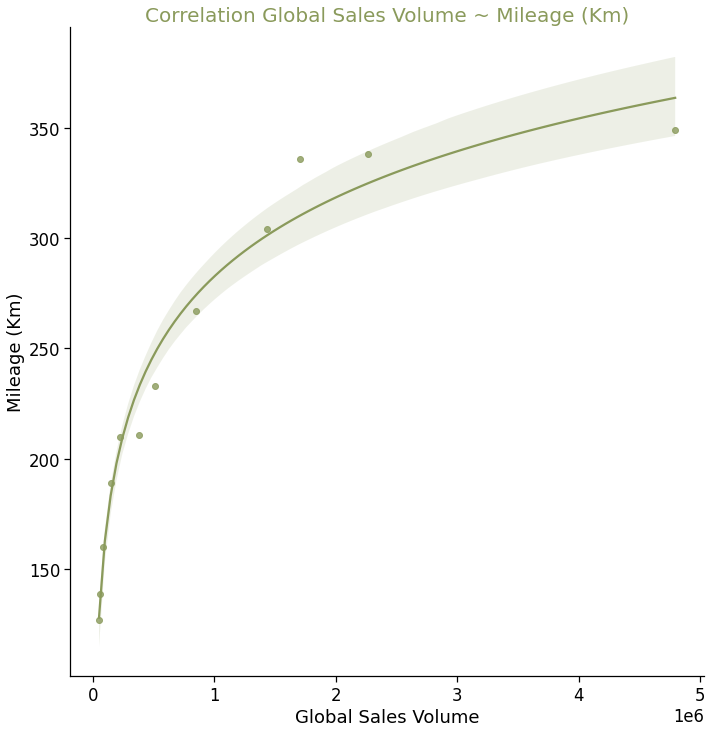

In [16]:
#DisplayTrend(df, 'Mileage (Km)' , color_graph)
plotCorrelation(df, 'Global Sales Volume',  'Mileage (Km)', color_graph, True)

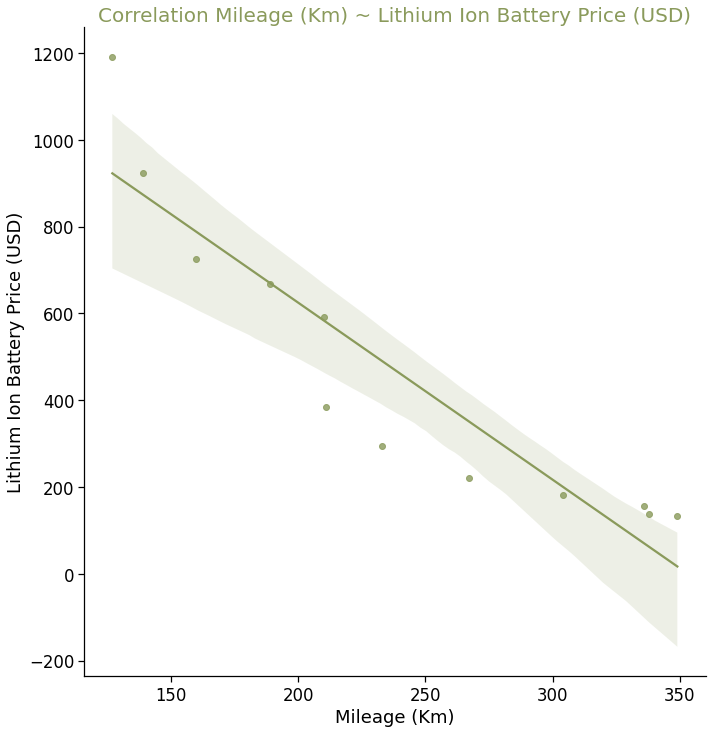

In [17]:
plotCorrelation(df,  'Mileage (Km)', 'Lithium Ion Battery Price (USD)', color_graph,  False)

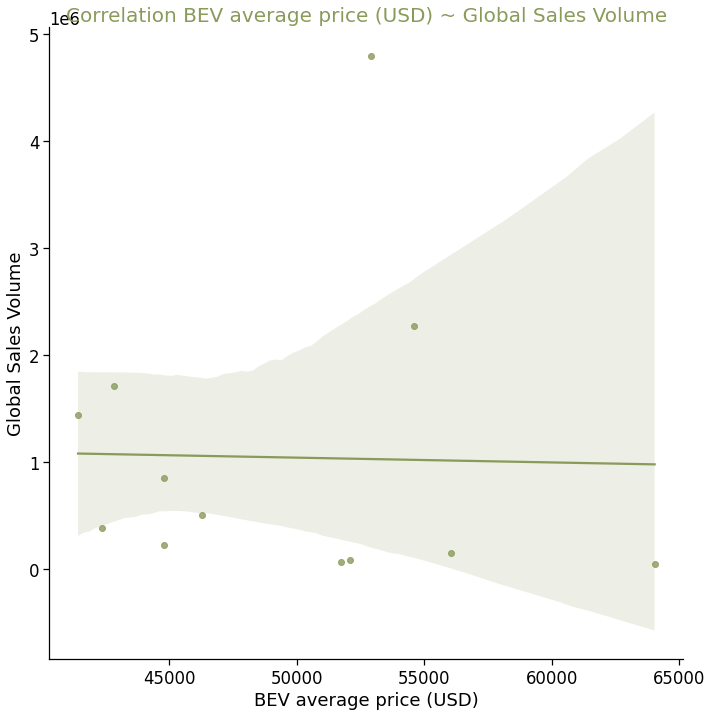

In [18]:
plotCorrelation(df,'BEV average price (USD)', 'Global Sales Volume', color_graph,  False)

<a id=conclusion></a> <br>
# <div style="text-align: Center; background-color: #8A9A5B; font-family:cursive; color: #E5E4E2 ; padding: 14px; line-height: 1;border-radius:20px">4. Conclusion </div>
[Table of contents](#TOC)



The data set gives information about the Battery Electric Vehicles (BEV) from 2010 to 2021. According to this dataset the global sales of the Battery Electric Vehicles have skyrocketed since 2010, it increases near 9500 % from 2010 to 2021. 

The price of the Battery Electric Vehicles fluctuates along the period, however the percentage change in this period shows a decrease in the average price of the Battery Electric Vehicle, in 2021 it is around -17%. Moreover, the mininum prices took place in 2018. The average price of a new car has increased between 2010 an 2021 however, the price of the Battery Electric Vehicles has decreased respected the average price of a new car. The price of the Lithium Ion Battery (USD) shows a continuous descent from 2010 to 2021. 

There are a strong positive correlation between the Global Sales Volumen and the Average Price of a new car, this correlation between Global Sales Volumen and Mileage (Km) is also positive and fit better a linear regression of the form Mileage ~ log(Global Sales Volumen); that is, the sales increases with the mileage. The relation between Milenage and Lithium Ion Battery Price (USD) is strongly negative, in spite of the milenage has grown the price of the Lithium Ion Battery has decreased along the period. Surprisingly, there are not relation between the BEV average price (USD) and Global Sales Volumen.

<a id=references></a> <br>
# <div style="text-align: Center; background-color: #8A9A5B; font-family:cursive; color: #E5E4E2 ; padding: 14px; line-height: 1;border-radius:20px">5. References </div>
[Table of contents](#TOC)

><a name="cite-CalculateSalesGrowth"/><sup>[^](#ref-1)  </sup>How do you calculate sales growth?.
https://mileiq.com/blog-en-us/how-to-calculate-sales-growth#:~:text=How%20do%20you%20calculate%20sales,get%20the%20percent%20sales%20growth.

><a name="cite-Lithium-IonBattery"/><sup>[^](#ref-2)  </sup>Weidong Chen, Jun Liang, Zhaohua Yang, Gen Li,
A Review of Lithium-Ion Battery for Electric Vehicle Applications and Beyond,
Energy Procedia,
Volume 158,
2019,
Pages 4363-4368,
ISSN 1876-6102,
https://doi.org/10.1016/j.egypro.2019.01.783.
(https://www.sciencedirect.com/science/article/pii/S1876610219308215)



## Thanks for reading! 🐸